<a href="https://colab.research.google.com/github/ryonpham/Tu-n-5/blob/main/27_2_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=c01a834c98b704152bd9f339fbc412266722c76c1a4d2a95293af72d2950ed7d
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


16.54901960784313


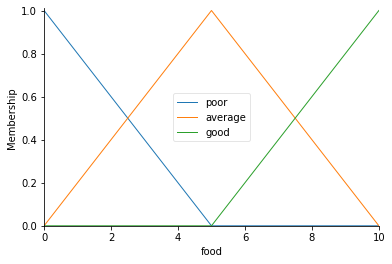

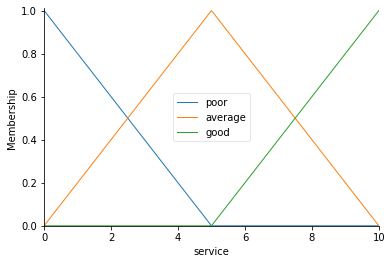

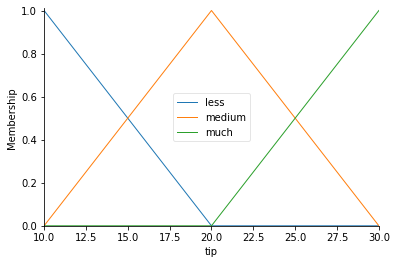

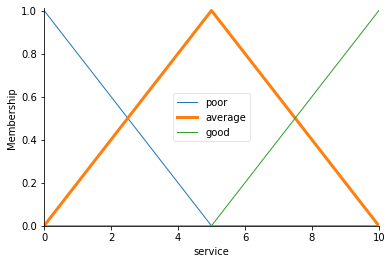

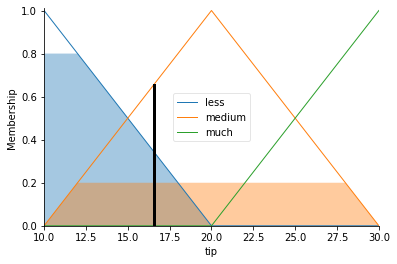

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['medium']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])
food.view()
service.view()
tip.view()
service['average'].view()
rule1=ctrl.Rule(food['poor']&service['poor'], tip['less'])
rule2=ctrl.Rule(food['poor']&service['average'], tip['less'])
rule3=ctrl.Rule(food['poor']&service['good'], tip['medium'])
rule4=ctrl.Rule(food['average']&service['poor'], tip['less'])
rule5=ctrl.Rule(food['average']&service['average'], tip['medium'])
rule6=ctrl.Rule(food['average']&service['good'], tip['much'])
rule7=ctrl.Rule(food['good']&service['poor'], tip['medium'])
rule8=ctrl.Rule(food['good']&service['average'], tip['much'])
rule9=ctrl.Rule(food['good']&service['good'], tip['much'])
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=1
tipping.input['service']=1
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)